# Análise dos Dados

In [1]:
import warnings
warnings.filterwarnings("ignore") 
import os
import warnings
from darts import TimeSeries
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from dataset.data import get_dataset
from dataset.data import get_dados
from dataset.data import get_dataset_diff

%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams ['figure.figsize'] = 25, 8
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18 

## Dataset Original com todos os dados

In [57]:
total_series = pd.read_excel('oil_daily.xlsx', sheet_name='oil_d', index_col=0, parse_dates=True)
columns = ['wti_d','eur_d', 'wor_d']
series = total_series[columns].dropna()
series = series[(series > 0).all(axis=1)]
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2796 entries, 2013-01-02 to 2024-02-16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wti_d   2796 non-null   float64
 1   eur_d   2796 non-null   float64
 2   wor_d   2796 non-null   float64
dtypes: float64(3)
memory usage: 87.4 KB


Gráfico da ST do Óleo Brent

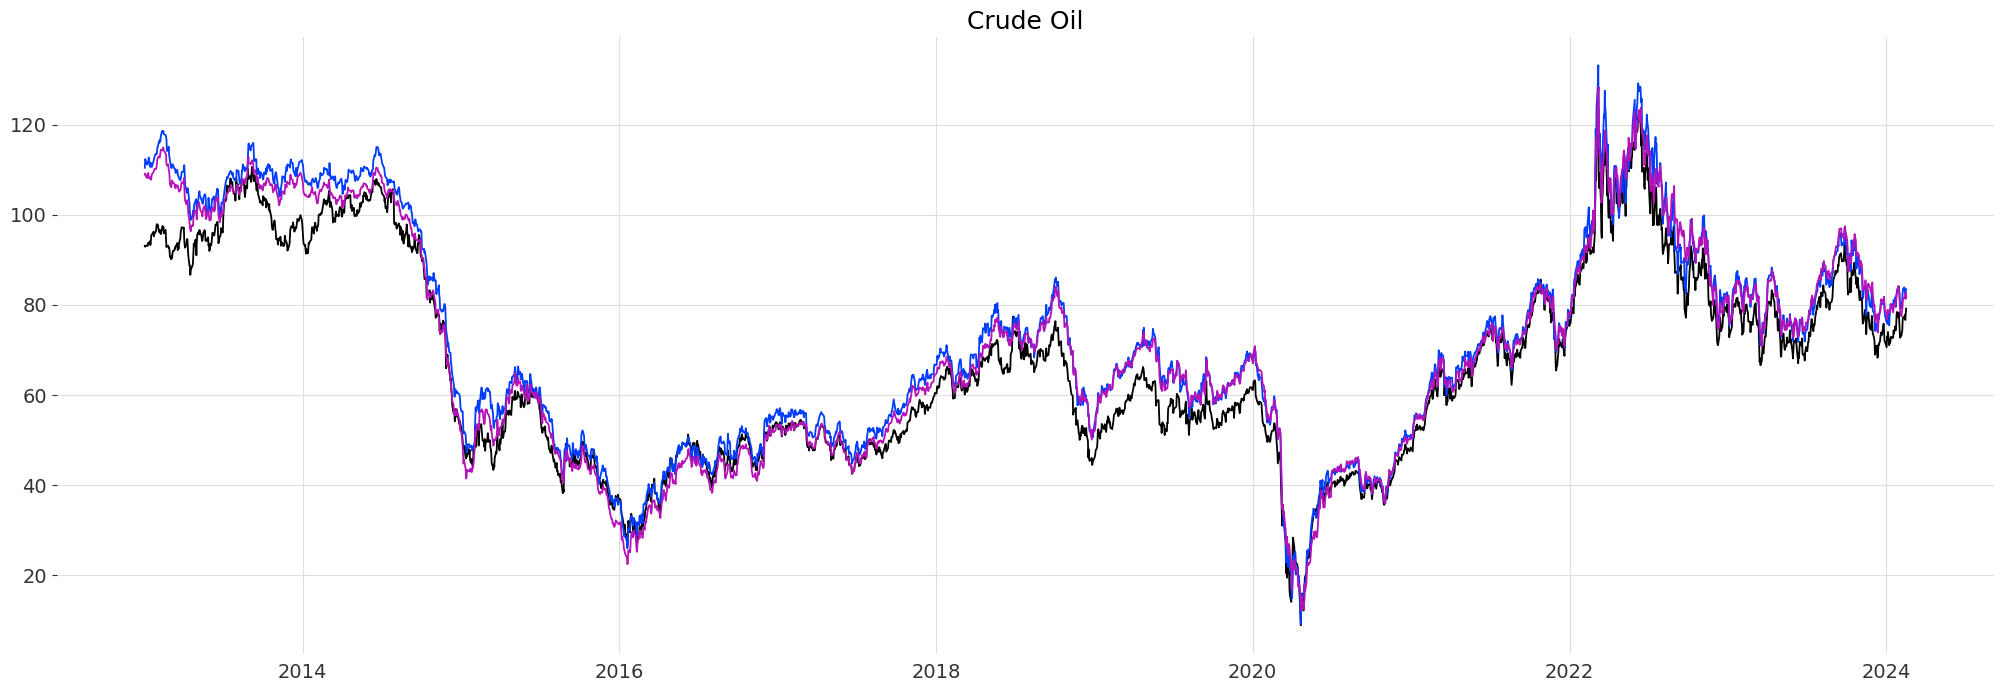

In [58]:
fig, ax = plt.subplots(figsize=(25, 8), )
ax.plot(series.index, series.wti_d)
ax.plot(series.index, series.eur_d)
ax.plot(series.index, series.wor_d)
ax.set_title('Crude Oil')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
plt.show()

In [59]:
series.describe()

,wti_d,eur_d,wor_d
count,2796.000000,2796.000000,2796.000000
mean,67.016828,72.051001,70.345908
std,21.860511,23.847281,23.864850
min,8.910000,9.120000,12.220000
25%,49.587500,53.795000,51.042500
50%,63.285000,68.790000,67.240000
75%,83.267500,88.070000,88.402500
max,123.640000,133.180000,128.270000


## Teste de Estacionariedade - Dickey Fuller (ADF)

In [60]:
# Aplicação no dataset

import pandas as pd
from statsmodels.tsa.stattools import adfuller

columns_to_plot = ['wti_d','eur_d', 'wor_d']
results_list = []
for coluna in columns_to_plot:
    result = adfuller(series[coluna].dropna())
    results_list.append({
        'Coluna': coluna,
        'ADF Estatísticas': round(result[0], 4),
        'Valor de P': round(result[1], 4),
        'Valores Críticos': {key: round(value, 4) for key, value in result[4].items()},
        'Estacionariedade': 'Não Estacionária' if result[1] > 0.05 else 'Estacionária'
    })
results_table = pd.DataFrame(results_list)
print(results_table)

  Coluna  ADF Estatísticas  Valor de P  \
0  wti_d           -1.8743      0.3442   
1  eur_d           -2.3796      0.1476   
2  wor_d           -2.1937      0.2085   

                                 Valores Críticos  Estacionariedade  
0  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}  Não Estacionária  
1  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}  Não Estacionária  
2  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}  Não Estacionária  


### Executando uma Transformação para Log

#### Aplicação do log

In [61]:
# Aplicação no dataset

import pandas as pd
from statsmodels.tsa.stattools import adfuller

columns_to_plot = ['wti_d','eur_d', 'wor_d']
results_list = []
for coluna in columns_to_plot:
    log = np.log(series.dropna())
    result = adfuller(series[coluna].dropna())
    results_list.append({
        'Coluna': coluna,
        'ADF Estatísticas': round(result[0], 4),
        'Valor de P': round(result[1], 4),
        'Valores Críticos': {key: round(value, 4) for key, value in result[4].items()},
        'Estacionariedade': 'Não Estacionária' if result[1] > 0.05 else 'Estacionária'
    })
results_table = pd.DataFrame(results_list)
print(results_table)

  Coluna  ADF Estatísticas  Valor de P  \
0  wti_d           -1.8743      0.3442   
1  eur_d           -2.3796      0.1476   
2  wor_d           -2.1937      0.2085   

                                 Valores Críticos  Estacionariedade  
0  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}  Não Estacionária  
1  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}  Não Estacionária  
2  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}  Não Estacionária  


#### Aplicação de Diferenciação com Log

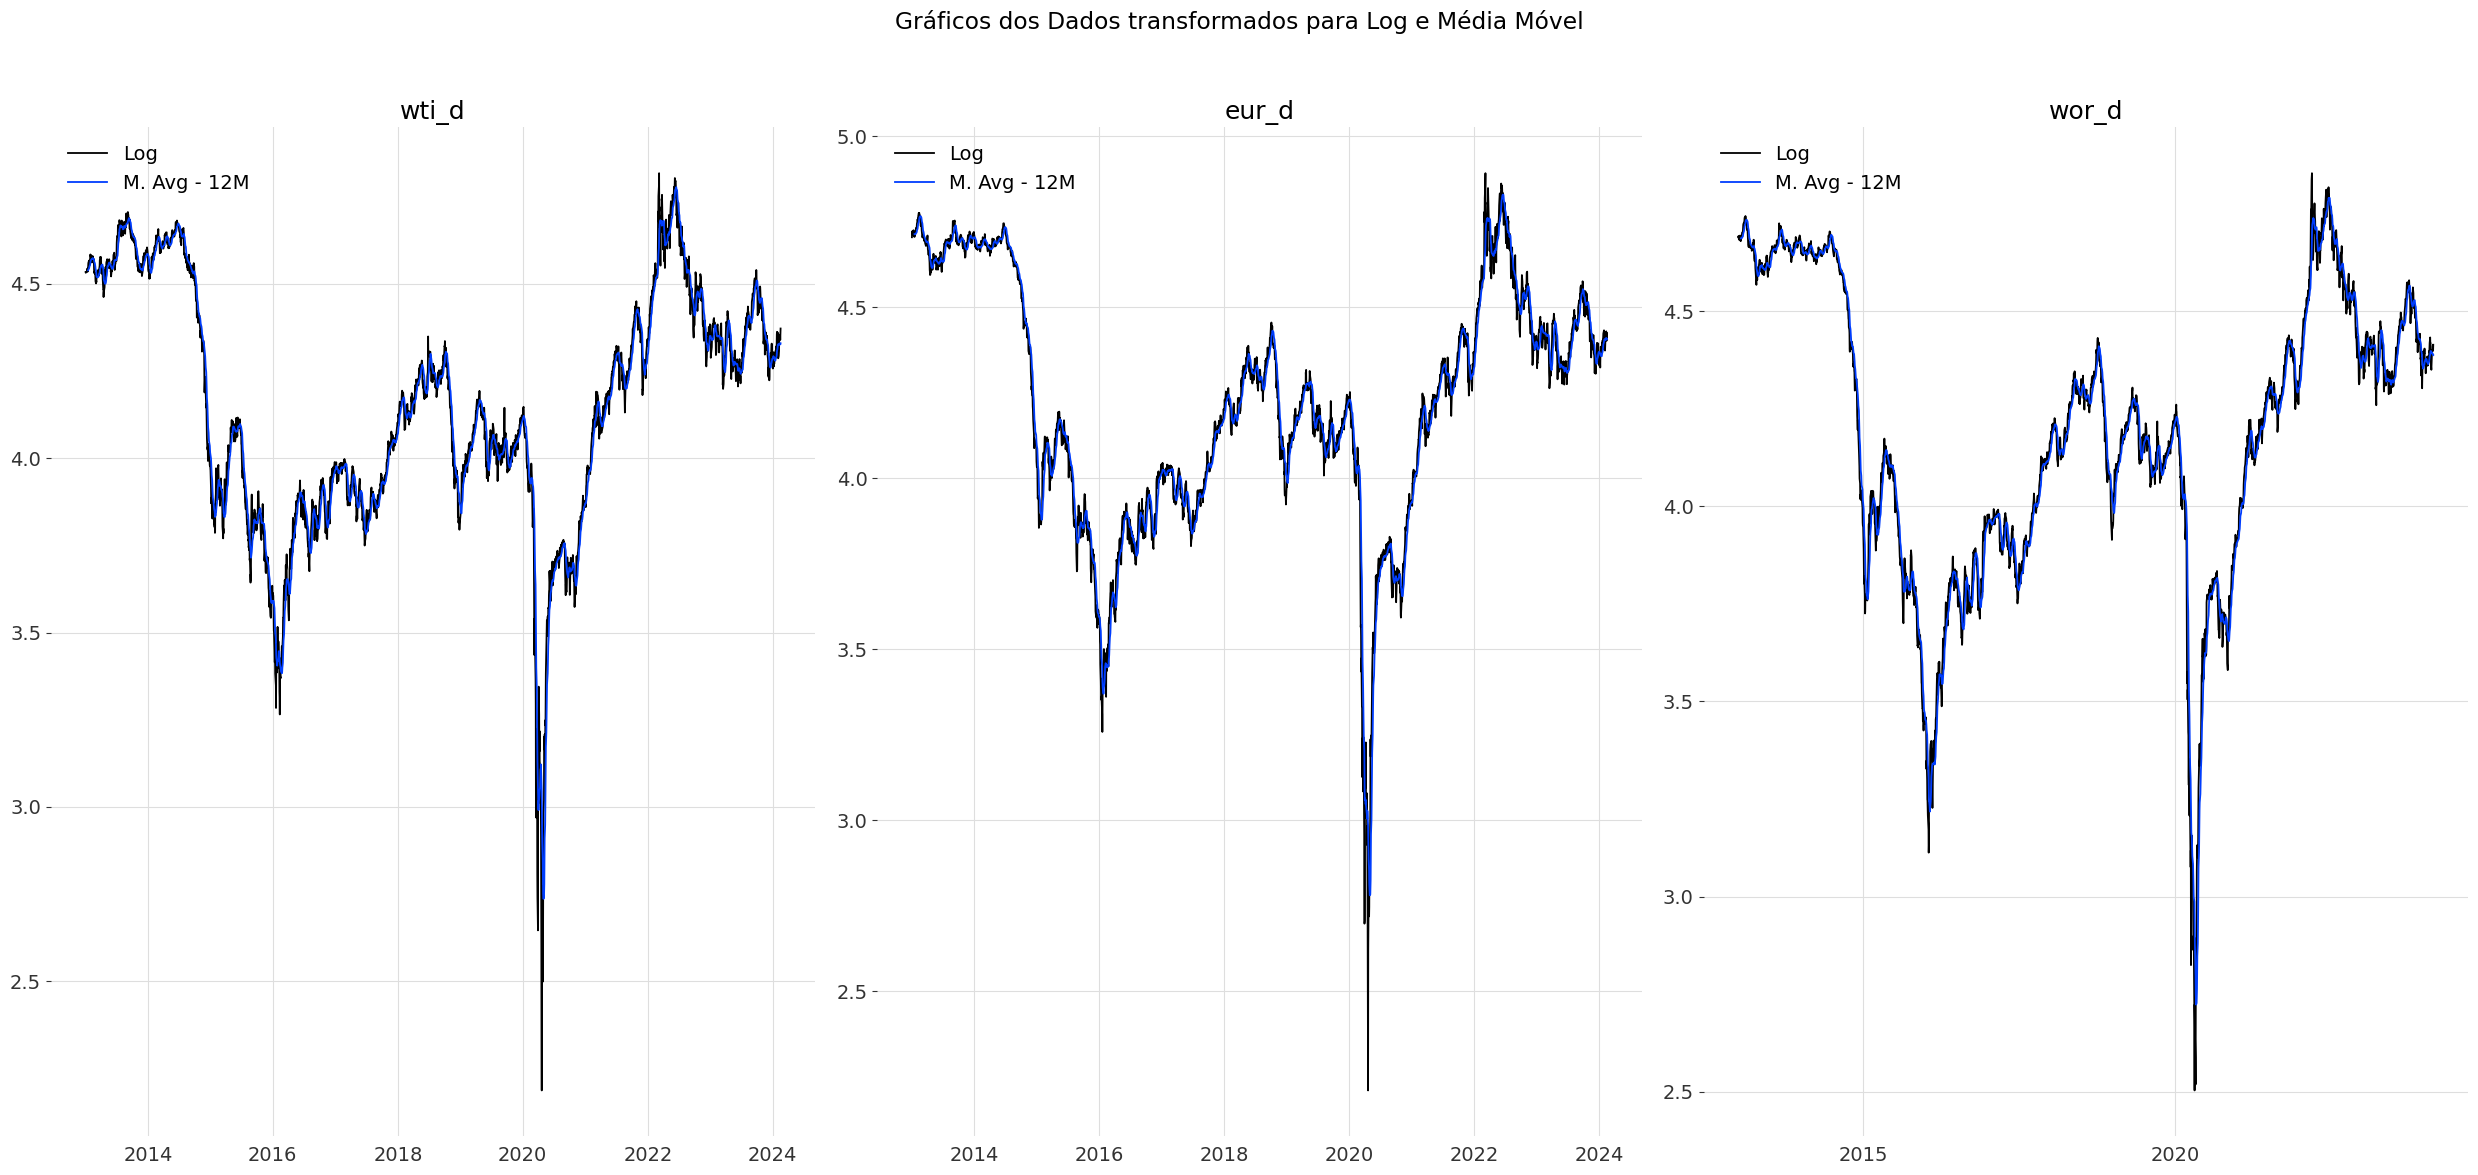

In [62]:
# Aplicação no dataset

fig, axs = plt.subplots(1, 3, figsize=(25, 12), sharey=False, sharex=False)
fig.suptitle('Gráficos dos Dados transformados para Log e Média Móvel')
columns_to_plot = ['wti_d','eur_d', 'wor_d']

for i, ax in enumerate(axs):
    log = np.log(series.dropna())
    mavg = log.rolling(window=12).mean().dropna()
    
    # Plot da série com log
    ax.plot(log.index, log[columns_to_plot[i]], label='Log')
    ax.plot(mavg.index, mavg[columns_to_plot[i]], label='M. Avg - 12M')
    ax.set_title(columns_to_plot[i])
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
ax.xaxis.set_major_locator(mdates.YearLocator(5))
plt.show()


#### Exportando as séries após transtormação com potência 2

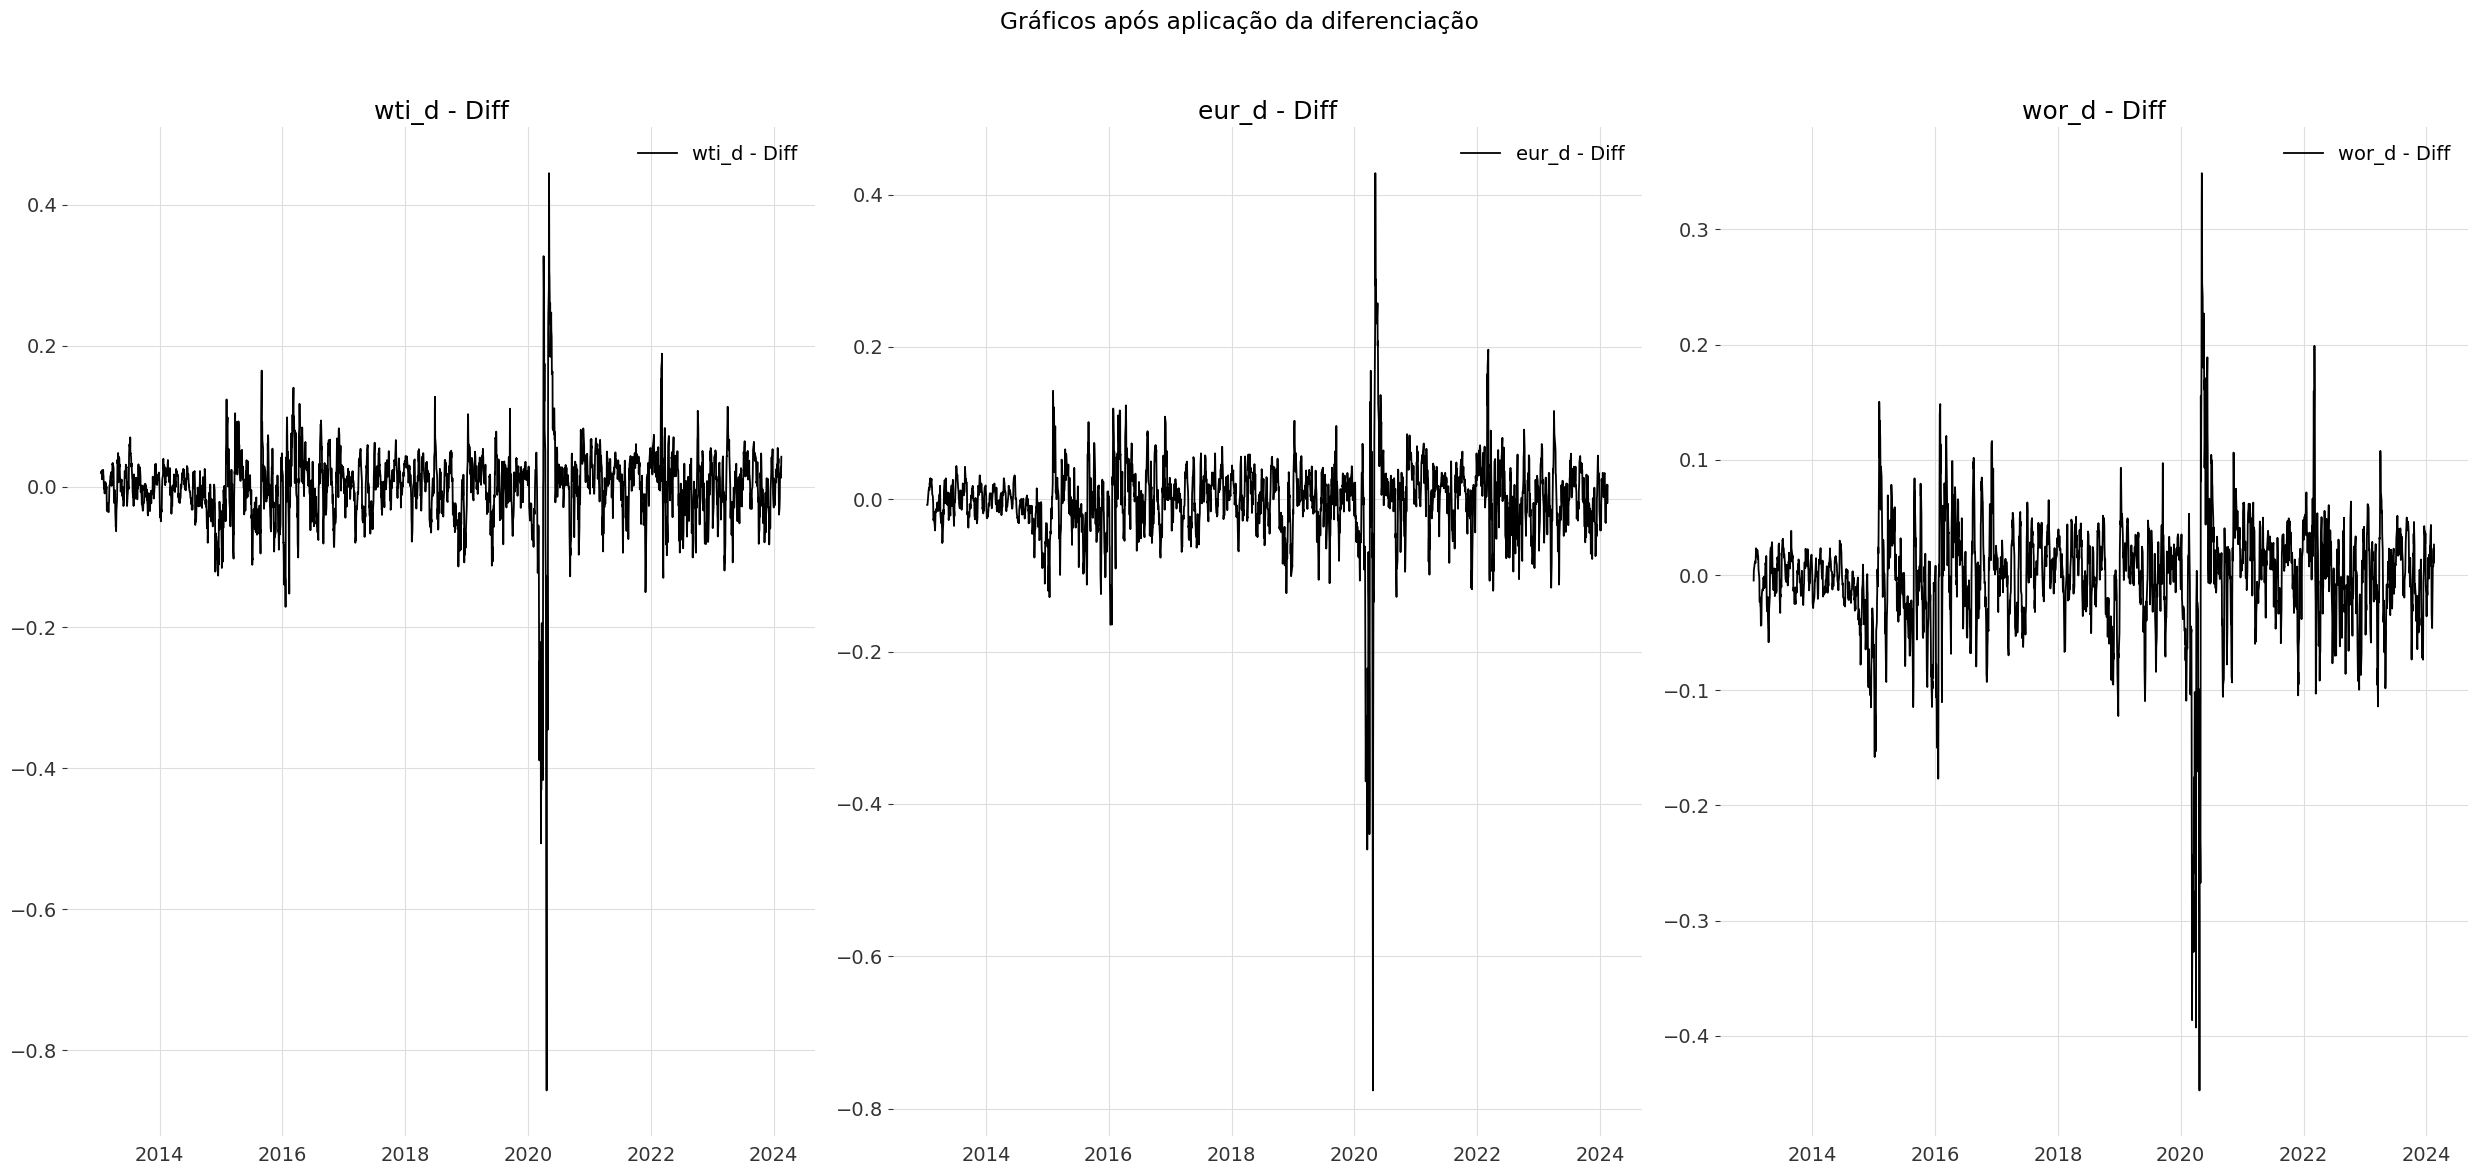

In [63]:
columns_to_plot = ['wti_d','eur_d', 'wor_d']
fig, axs = plt.subplots(1, 3, figsize=(25, 12), sharey=False)
fig.suptitle('Gráficos após aplicação da diferenciação')

for i, ax in enumerate(axs):
    coluna = columns_to_plot[i]
    log = np.log(series[coluna].dropna())
    mavg = log.rolling(window=12).mean().dropna()
    diff = log - mavg
    diff.dropna(inplace=True)

    ax.plot(diff.index, diff, label=f"{coluna} - Diff")
    ax.set_title(f"{coluna} - Diff")
    ax.legend()

    # Criação de uma nova variável com o nome da coluna seguido de "_diff"
    series[f"{coluna}_diff"] = diff

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [64]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2796 entries, 2013-01-02 to 2024-02-16
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wti_d       2796 non-null   float64
 1   eur_d       2796 non-null   float64
 2   wor_d       2796 non-null   float64
 3   wti_d_diff  2785 non-null   float64
 4   eur_d_diff  2785 non-null   float64
 5   wor_d_diff  2785 non-null   float64
dtypes: float64(6)
memory usage: 152.9 KB


In [65]:
series.describe()

,wti_d,eur_d,wor_d,wti_d_diff,eur_d_diff,wor_d_diff
count,2796.000000,2796.000000,2796.000000,2785.000000,2785.000000,2785.000000
mean,67.016828,72.051001,70.345908,-0.000383,-0.000593,-0.000568
std,21.860511,23.847281,23.864850,0.056253,0.053382,0.050108
min,8.910000,9.120000,12.220000,-0.857010,-0.776233,-0.447327
25%,49.587500,53.795000,51.042500,-0.023406,-0.021638,-0.020641
50%,63.285000,68.790000,67.240000,0.004048,0.002578,0.002358
75%,83.267500,88.070000,88.402500,0.026220,0.024408,0.022962
max,123.640000,133.180000,128.270000,0.444686,0.428102,0.348825


#### Teste de Estacionariedade após diferenciação das séries

In [66]:
# Aplicação no dataset

import pandas as pd
from statsmodels.tsa.stattools import adfuller

columns_to_plot = ['wti_d_diff', 'eur_d_diff', 'wor_d_diff']
results_list = []
for coluna in columns_to_plot:
    result = adfuller(series[coluna].dropna())
    results_list.append({
        'Coluna': coluna,
        'ADF Estatísticas': round(result[0], 4),
        'Valor de P': round(result[1], 4),
        'Valores Críticos': {key: round(value, 4) for key, value in result[4].items()},
        'Estacionariedade': 'Não Estacionária' if result[1] > 0.05 else 'Estacionária'
    })
results_table = pd.DataFrame(results_list)
print(results_table)

       Coluna  ADF Estatísticas  Valor de P  \
0  wti_d_diff           -8.3376         0.0   
1  eur_d_diff           -8.6351         0.0   
2  wor_d_diff           -8.3749         0.0   

                                 Valores Críticos Estacionariedade  
0  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}     Estacionária  
1  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}     Estacionária  
2  {'1%': -3.4327, '5%': -2.8626, '10%': -2.5673}     Estacionária  


In [67]:
from openpyxl import load_workbook 
series.to_excel('oil_daily.xlsx', sheet_name='oil_d', index=True, engine='openpyxl')

### Histogramas após Diferenciação

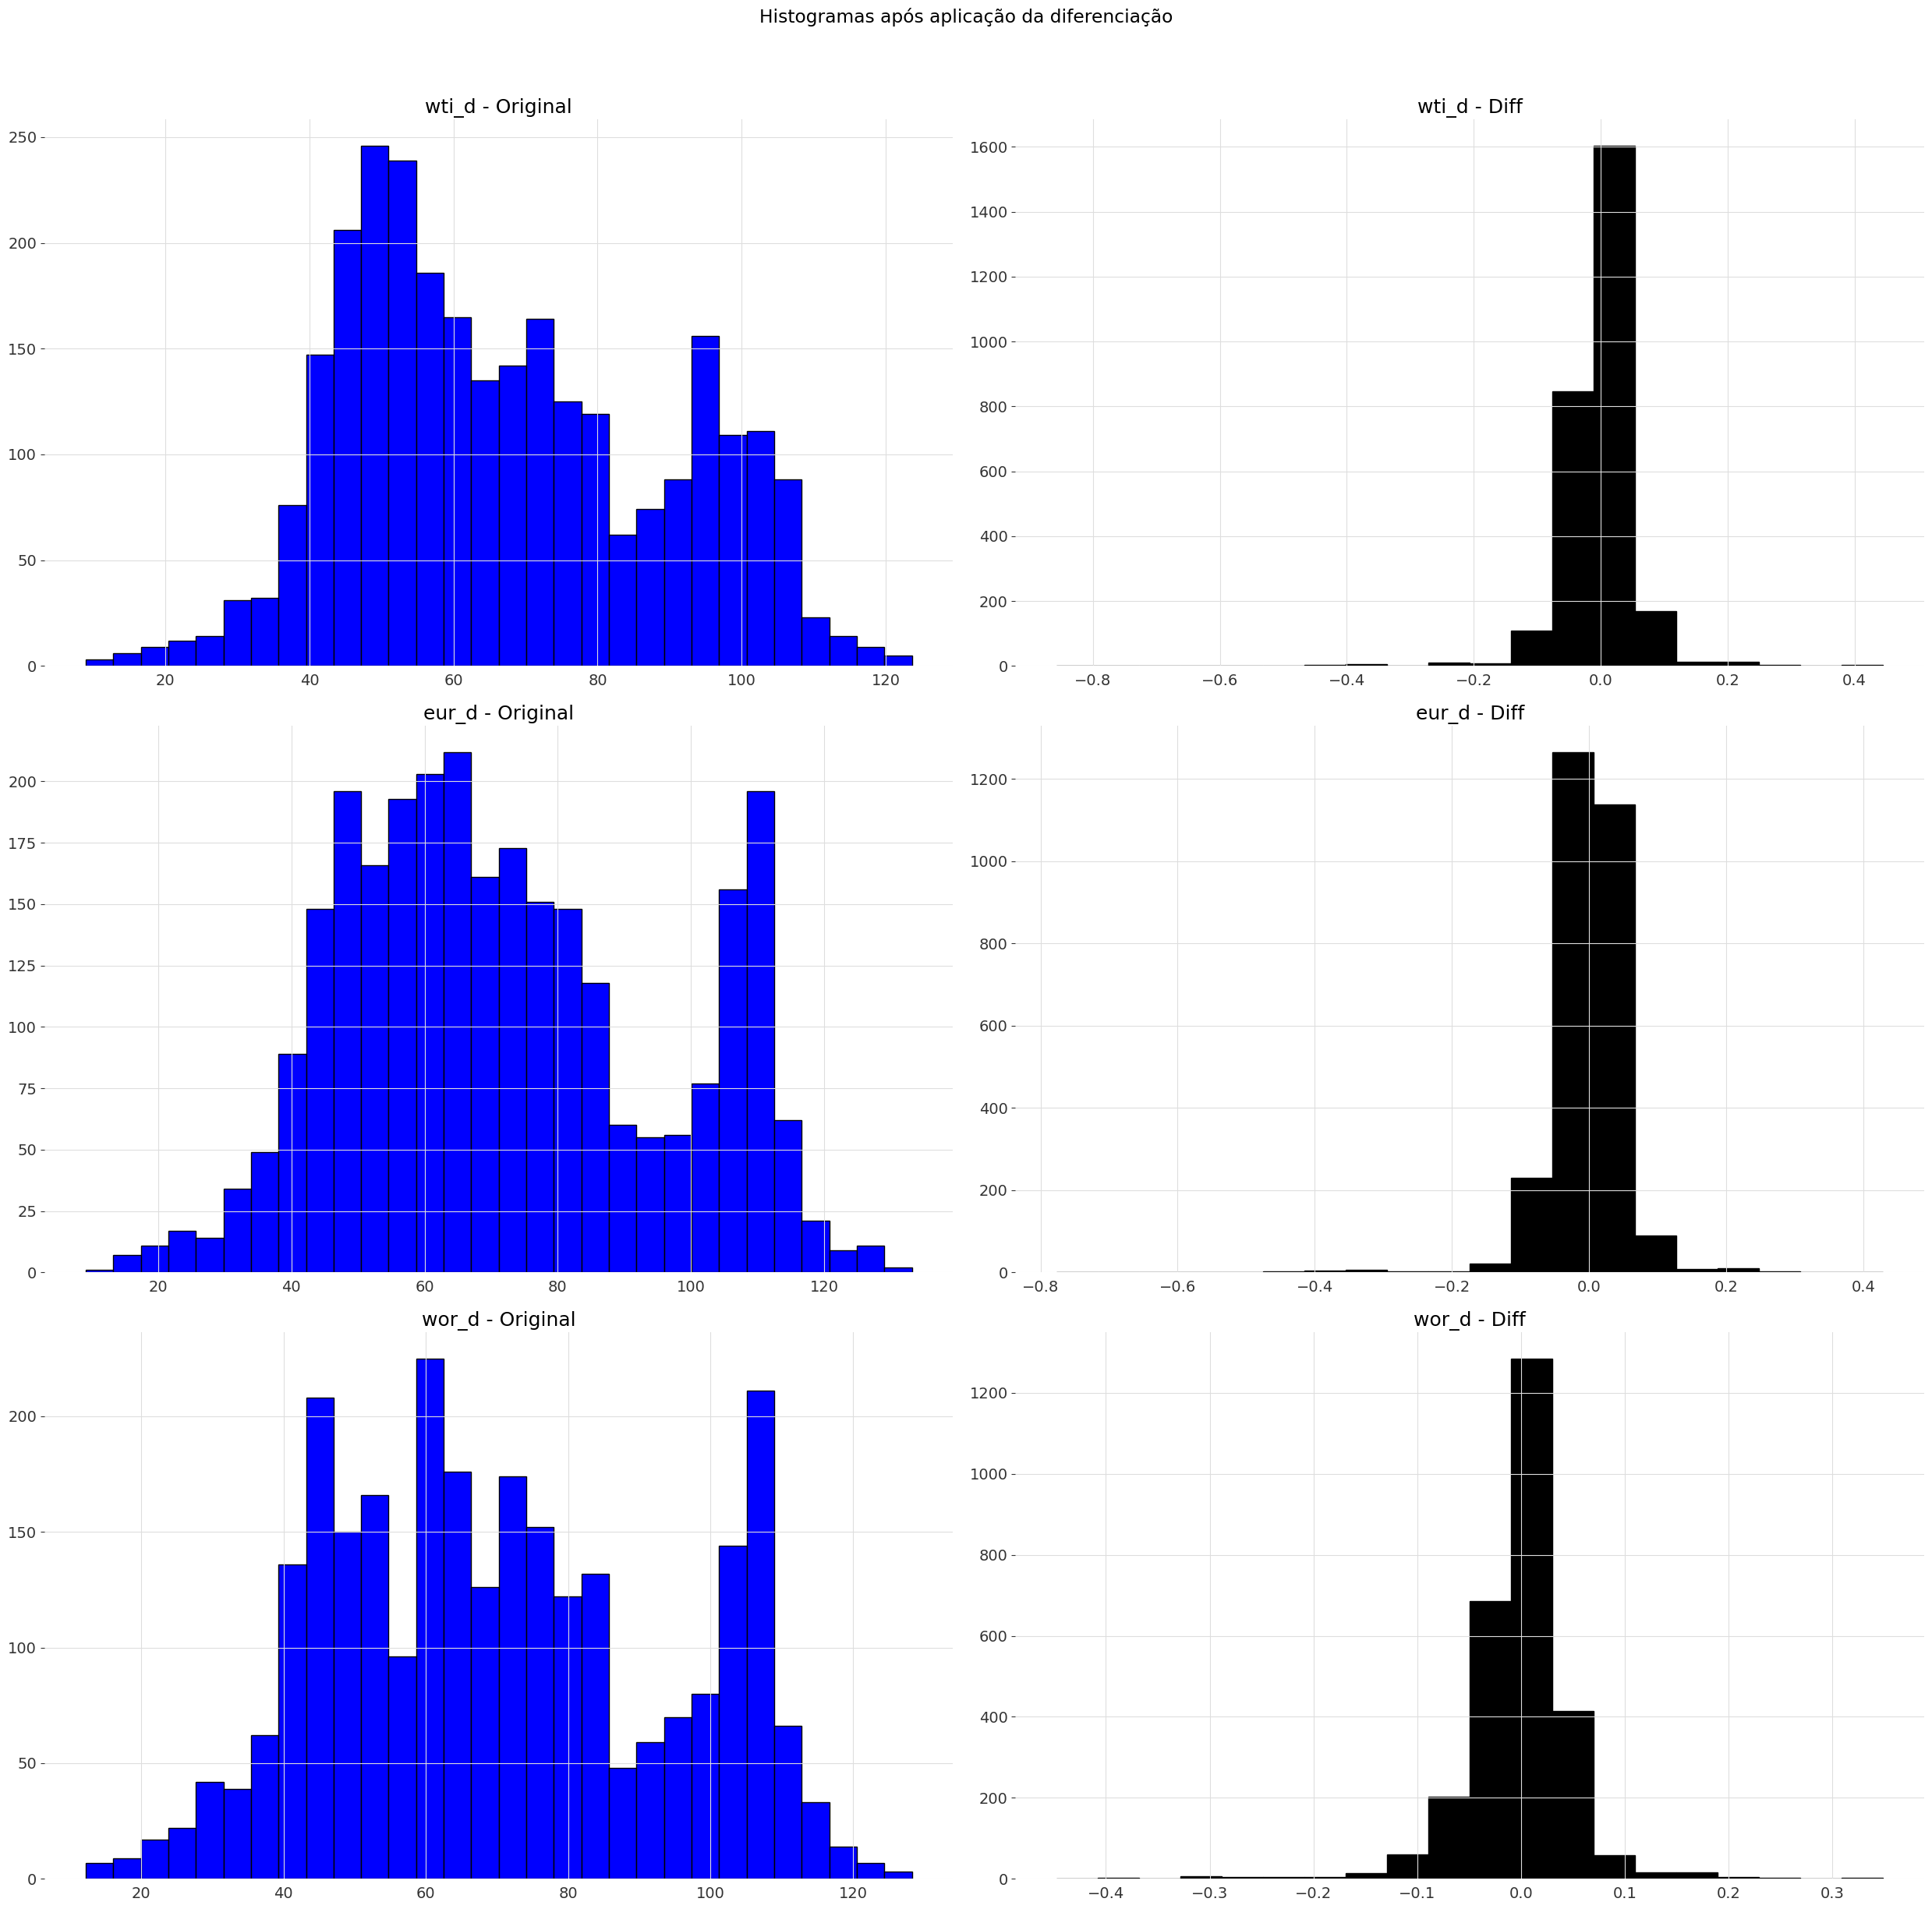

In [68]:
import matplotlib.pyplot as plt
import numpy as np

columns_to_plot = ['wti_d','eur_d', 'wor_d']
fig, axs = plt.subplots(3, 2, figsize=(25, 25), sharey=False)
fig.suptitle('Histogramas após aplicação da diferenciação')

for i in range(axs.shape[0]):
    coluna = columns_to_plot[i]
    
    log = np.log(series[coluna].dropna())
    mavg = log.rolling(window=12).mean().dropna()
    log.dropna(inplace=True)
    mavg.dropna(inplace=True)
    diff = log - mavg
    diff.dropna(inplace=True)
    
    # Plotagem do histograma da série original
    axs[i, 0].hist(series[coluna], bins=30, color='blue', edgecolor='black')
    axs[i, 0].set_title(f"{coluna} - Original")
    
    # Plotagem do histograma da diferença
    axs[i, 1].hist(diff, bins=20, color='black', edgecolor='black')
    axs[i, 1].set_title(f"{coluna} - Diff")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
